<a href="https://colab.research.google.com/github/mgfernan/gsl_uab/blob/main/paul/F4_runner_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Race timing system



Image of the Barcelona marathon route


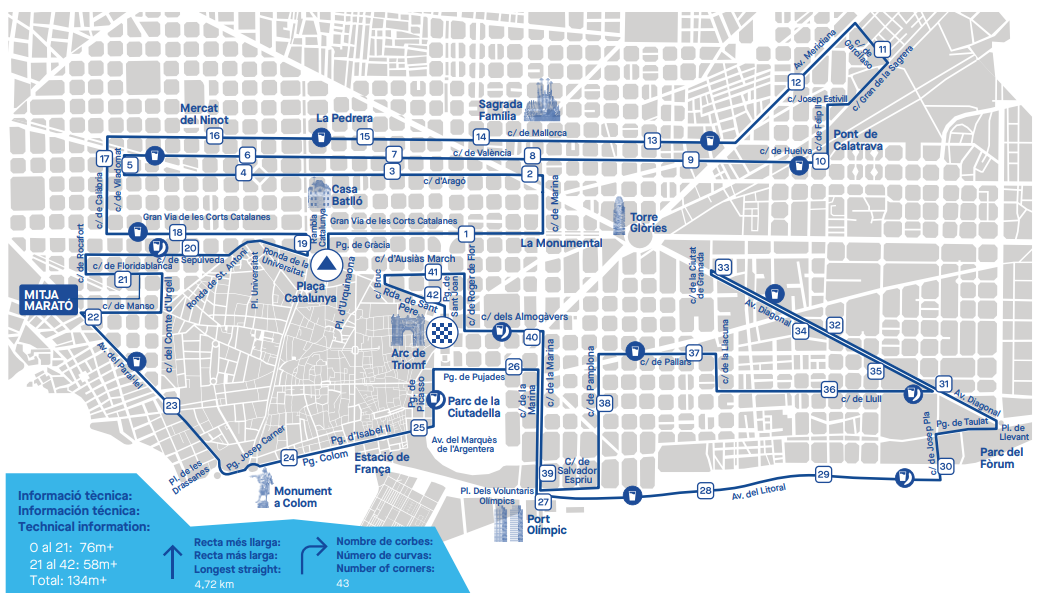

Image of the app that offers live tracking to the runners of the marathon


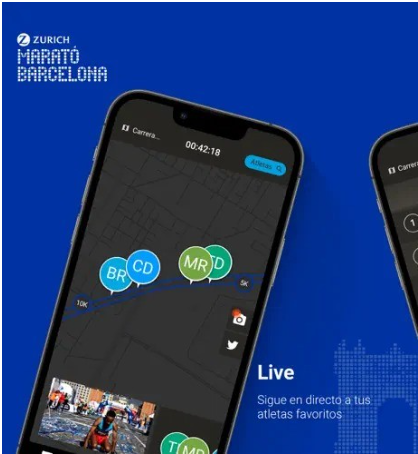

(a) What technology could be used for this purpose?

(b) What are the measurements that this technology provides and how are these measurements obtained (i.e. working principles)

In [31]:
from dataclasses import dataclass
import datetime
from typing import List

import numpy as np

Construct a list of checkpoints, where each checkpoint

In [32]:
@dataclass
class Checkpoint:
  distance_km: int
  epoch: datetime.time

  def __sub__(self, other: 'Checkpoint'):
    """
    Define subtract method
    """

    # Compute the time difference (leverage the datetime '-' operator)
    time_diff = self.epoch - other.epoch
    time_diff_seconds = time_diff.total_seconds()

    return (self.distance_km - other.distance_km, time_diff_seconds)

CHECKPOINTS: List[Checkpoint] = [
  Checkpoint(5, datetime.datetime(2025, 1, 1, 0, 20, 0)),
  Checkpoint(10, datetime.datetime(2025, 1, 1, 0, 41, 0)),
  Checkpoint(15, datetime.datetime(2025, 1, 1, 1, 3, 0)),
  Checkpoint(20, datetime.datetime(2025, 1, 1, 1, 25, 30)),
  Checkpoint(25, datetime.datetime(2025, 1, 1, 1, 48, 45)),
  Checkpoint(30, datetime.datetime(2025, 1, 1, 2, 12, 30)),
  Checkpoint(35, datetime.datetime(2025, 1, 1, 2, 37, 0)),
  Checkpoint(40, datetime.datetime(2025, 1, 1, 3, 2, 15)),
]

(c) Calculate the average pace of Runner X between each consecutive checkpoint in minutes per km.

In [33]:
# Compute the difference of the elements in the checkpoint array
partials = np.diff(CHECKPOINTS)

In [34]:
paces = [time_diff_s/60/distance_km for distance_km, time_diff_s in partials]
paces

[4.2, 4.4, 4.5, 4.65, 4.75, 4.9, 5.05]

(d) Based on the data, at what approximate time did Runner X cross the half-marathon checkpoint of the race (21.0975 km)?

In [59]:
pace_before_half_marathon_checkpoint = paces[2]
pace_before_half_marathon_checkpoint

4.5

In [36]:
extra_distance_km = 0.0975
estimated_time_min = pace_before_half_marathon_checkpoint * extra_distance_km
estimated_time_min

0.43875000000000003

In [39]:
time_at_half_marathon = CHECKPOINTS[3].epoch + datetime.timedelta(minutes=estimated_time_min)
time_at_half_marathon.time()

datetime.time(1, 25, 56, 325000)

(e) Imagine it's 2 hours and 20 minutes into the race. Where would you estimate Runner X's position to be on the course?

In [44]:
# Based on the checkpoints we should be between km 30 and 35
last_checkpoint = CHECKPOINTS[5]
last_checkpoint

Checkpoint(distance_km=30, epoch=datetime.datetime(2025, 1, 1, 2, 12, 30))

In [56]:
pace_at_checkpoint = paces[4]
pace_at_checkpoint

4.75

In [49]:
time_elapsed_since_last_checkpoint_s = (datetime.datetime(2025, 1, 1, 2, 20) - last_checkpoint.epoch).total_seconds()
time_elapsed_since_last_checkpoint_s

450.0

In [52]:
distance_ran_km = time_elapsed_since_last_checkpoint_s / 60 / pace_at_checkoint
distance_ran_km

1.5789473684210527

In [54]:
last_checkpoint.distance_km + distance_ran_km

31.57894736842105

(f) What is the estimated finishing time for the marathon (42.195 km)?

In [57]:
extra_distance_km = 42.195 - CHECKPOINTS[-1].distance_km

estimated_time_min = paces[-1] * extra_distance_km
estimated_time_min

11.084750000000001

In [58]:
total_race_time = CHECKPOINTS[-1].epoch + datetime.timedelta(minutes=estimated_time_min)
total_race_time.time()

datetime.time(3, 13, 20, 85000)